In [2]:
import sys

sys.path.append("../")

In [3]:
from data.utils import load_mean_parameters,rot6d_to_rotmat
from data.render_utils import Renderer
from data.eft_dataset import EFTDataset
import constants
import config
from models.smpl import get_smpl_model

import torch
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset = EFTDataset(is_train=False)

In [19]:
sample = dataset[0]

img = sample['img']
shape = sample['shape']
pose = sample['pose']
cam = sample['cam']

#theta_mean = load_mean_parameters(config.SMPL_MEAN_PARAMS,rot6d=True)#load the real theta_mean
smpl = get_smpl_model()

#pose = theta_mean[:,:144]
#shape = theta_mean[:,144:154]

#pose_mat = rot6d_to_rotmat(pose.reshape(-1,6)).reshape(-1,24,3,3)

pose = pose.flatten(1,2).unsqueeze(0)
shape = shape.unsqueeze(0)
output = smpl(global_orient=pose[:,:1,:],body_pose=pose[:,1:,:],betas=shape,pose2rot=False)


In [ ]:
renderer = Renderer(smpl.faces)

In [ ]:
pred_t = np.array([cam[1]/cam[0],cam[2]/cam[0],2*5000/(224*cam[0])])

In [ ]:
rendered_img = renderer(output.vertices.detach().numpy()[0],pred_t,img)

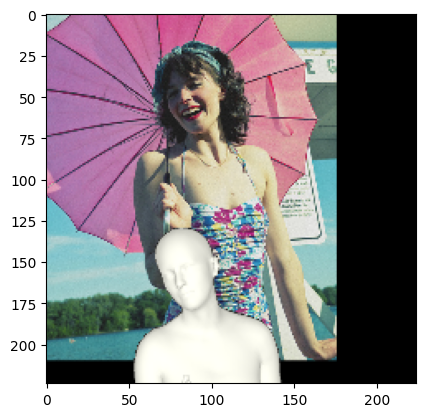

In [ ]:
plt.imshow(rendered_img)

#notes

